# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [116]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [129]:
#To ignore any warnings of deprecated packages or methods
import warnings
warnings.filterwarnings("ignore")

In [123]:
#loading datasets
train = pd.read_csv("data\\train.csv")
train_copy = train.copy()
test = pd.read_csv("data\\test.csv")

Lot Shape high means more regular shaped lot


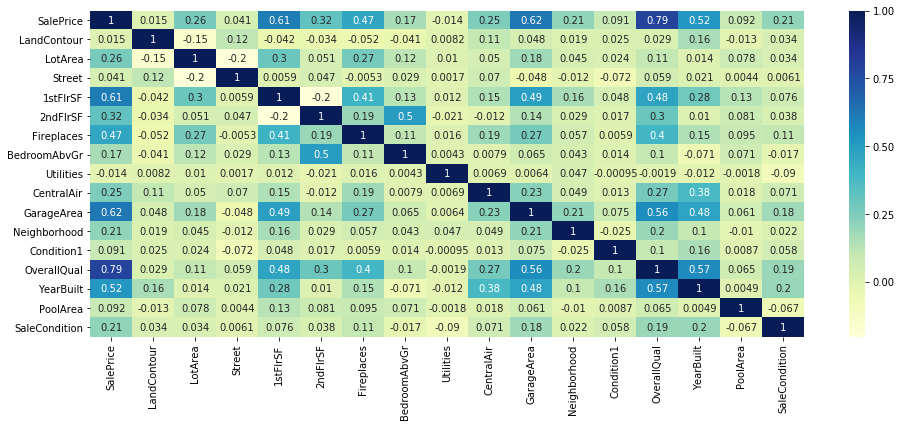

In [118]:
# TODO: show visualization
enc = LabelEncoder()
def encodeData(df,col):
    enc.fit(df[col])
    df[col] = enc.transform(df[col])

columns = ["SalePrice", "LandContour", "LotArea", "Street", "1stFlrSF", "2ndFlrSF", "Fireplaces", "BedroomAbvGr","Utilities", "CentralAir", "GarageArea", "Neighborhood", "Condition1", "OverallQual", "YearBuilt", "PoolArea", "SaleCondition"]
data = pd.DataFrame(train[columns])
series = data.applymap(np.isreal).iloc[0].items()
for index,item in series:
    if item == False:
        encodeData(data,index)
corr_data = data.corr(method='pearson')
plt.figure(figsize=(16,6))
sb.heatmap(corr_data, cmap="YlGnBu", annot=True)
print("Lot Shape high means more regular shaped lot")

Discuss most positive and negative correlations.

<p><b>The most positive correlations are:</b></p>
<ul>
    <li>Overall Quality and Year Built</li>
    <ul><li>If the house was built recently, then it's overall quality is quite good in comparsion to the houses that were build years ago.</li></ul>
    <li>Overall Quality and Sale Price</li>
    <ul><li>The Prices of house with high overall quality are quite high. Quality of the house refers to the quality of material used to build the house and the finish of the house.</li></ul>
    <li>Sale Price and Year Built</li>
    <ul><li>Newer houses have higher prices as they must have been build with advanced tools and high quality materials.</li></ul>
    <li>Sale Price and Garage Area</li>
    <ul><li>Houses having larger garage area are more expensive. Larger garage means larger overall area of the house.</li>
</ul>
    <li>First floor area and Sale Price</li>
    <ul><li>If the area of first floor is more than the prices are high.</li></ul>
</ul>
<p><b>The most negative correlations are:</b></p>
<ul>
    <li>First Floor Area and Second Floor Area</li>
    <ul><li>If the area of first floor is more than the area of second floor is less but the vice versa cannot be true.</li></ul>
    <li>Land Contour and Lot Area</li>
    <ul><li>Near Flat/level contour has lower lot area whereas Hill Side contour has high lot area.</li></ul>    
    <li>Street and Lot Area</li>
    <ul><li>Most of the lot area access is through paved street.</li></ul>
</ul>


## Part 2 - Informative Plots

### Plot 1: Trends in Sale Price

Mean amount of Sale Price: $180921
Houses priced greater than $400K: 28
Houses with price less than the mean price of $180K: 886
Total houses: 1460


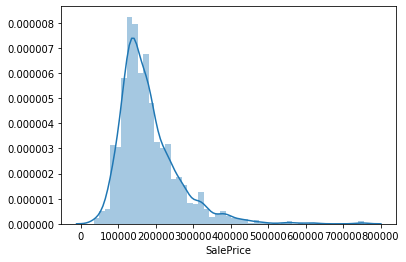

In [119]:
# TODO: code to generate Plot 1
sb.distplot(train["SalePrice"])
print("Mean amount of Sale Price: $%d"%train["SalePrice"].mean())
print("Houses priced greater than $400K: %d"%train[train["SalePrice"] > 400000]["SalePrice"].count())
print("Houses with price less than the mean price of $180K: %d"%train[train["SalePrice"] < 180000]["SalePrice"].count())
print("Total houses: %d"%train["SalePrice"].count())

What interesting properties does Plot 1 reveal?

<p>The Sale Price has a deviation from the normal distribution. The mean is a little shifted towards the left. The mean Sale price is around $\$$180K with a standard deviation of $\$$79K. There are only a few houses which are high priced i.e. greater than $\$$400K.</p>
<p>Let's also visualize a pairplot with some factors that affect Sale Price.</p>

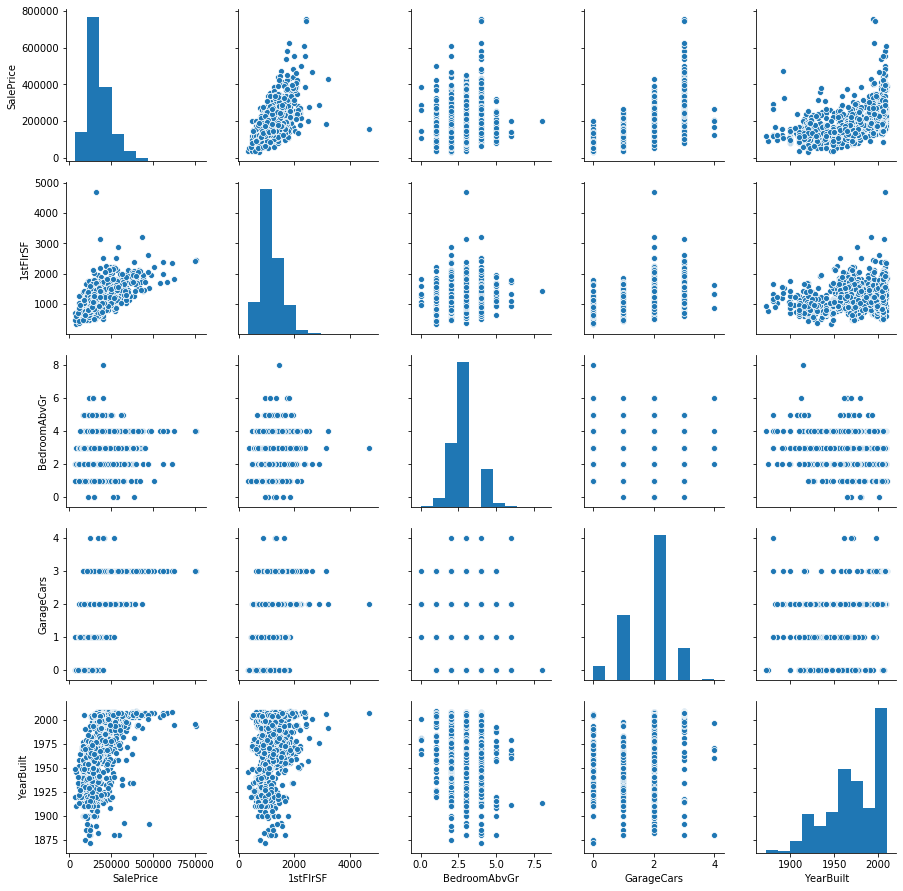

In [120]:
cols = ["SalePrice", "1stFlrSF", "BedroomAbvGr", "GarageCars", "YearBuilt"]
sb.pairplot(train[cols])

### Plot 2: Change in Garage Area over the years

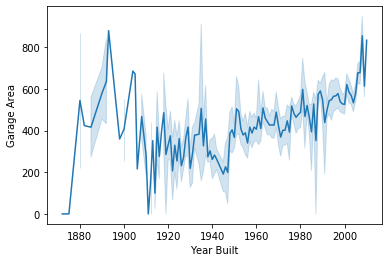

In [128]:
df = pd.DataFrame({"Garage Area": plot_df["GarageArea"], "Year Built": plot_df["YearBuilt"]})
sb.lineplot(data=df, y='Garage Area', x='Year Built')

What interesting properties does Plot 2 reveal?

<p>With time the are of garage in houses has increased. During the late 19th century, there seems to be a large increase in the garage area but this could be due to the fact that we have less house data for those years and the ones that we have were some exceptions where garage area was large.</p>
<p>After the 1900s we can see that there is a drop around 1940s, otherwise the garage area is increasing with the years. With the new age people wanted to have a garage that is big and thus the builders created houses with larger garage area. We can see that after 2000s, all the houses built had garage area greater that 400 square feet.</p>

### Plot 3: Sale Price and Overall Quality of the house

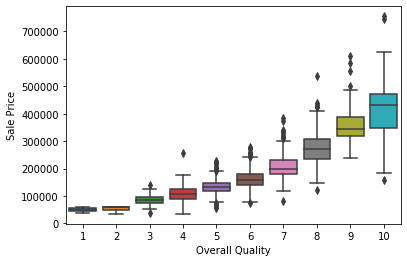

In [8]:
df = pd.DataFrame({"Sale Price": train["SalePrice"], "Overall Quality": train["OverallQual"]})
sb.boxplot(x="Overall Quality", y="Sale Price", data=df)

What interesting properties does Plot 3 reveal?

<p>As the quality of the house increases, the sale price increases as well. There is a strong positive correlation between the Sale Price and the Overall Quality of the house. Houses built with poor quality material have prices less than $\$$100K. As the material quality started increasing the sale price has increased with it. This is because higher grade material is of course costly.</p>
<p>With Overall Quality 7, the houses were priced around $\$$200K but if the quality increases more than 7, we can see a significant increase in the price of houses. Houses built with best material (Overall Quality: 10) have prices as high as $\$$700K.</p>

### Plot 4: Sale Price and Ground Living Area

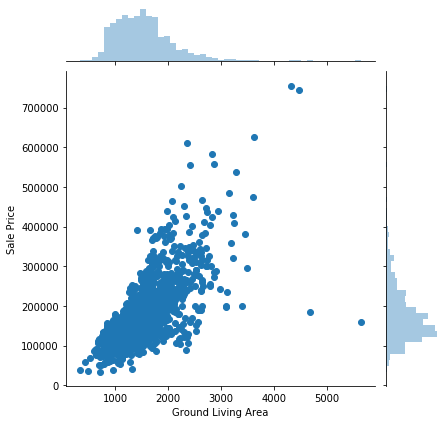

In [9]:
df = pd.DataFrame({"Sale Price": train["SalePrice"], "Ground Living Area": train["GrLivArea"]})
sb.jointplot(x="Ground Living Area", y="Sale Price", data=df)

What interesting properties does Plot 4 reveal?

The two values with high 'GrLivArea' on the bottom right seems to not follow the usual trend. This may be due to the fact that they are agricultural land and that is why they have such low prices. Other reason could be that there might be some spooky stories circulating around about these houses and thus nobody wants to buy them and that is why the land owner has decreased the sale price.

The other two values which are different from the most are the ones on the top. These do follow the similar trend but are quite high priced. This may be because they are large mansions and are quite well maintained.

### Plot 5: Factor Plot (Neighborhood, Sale Price and MS Zoning)

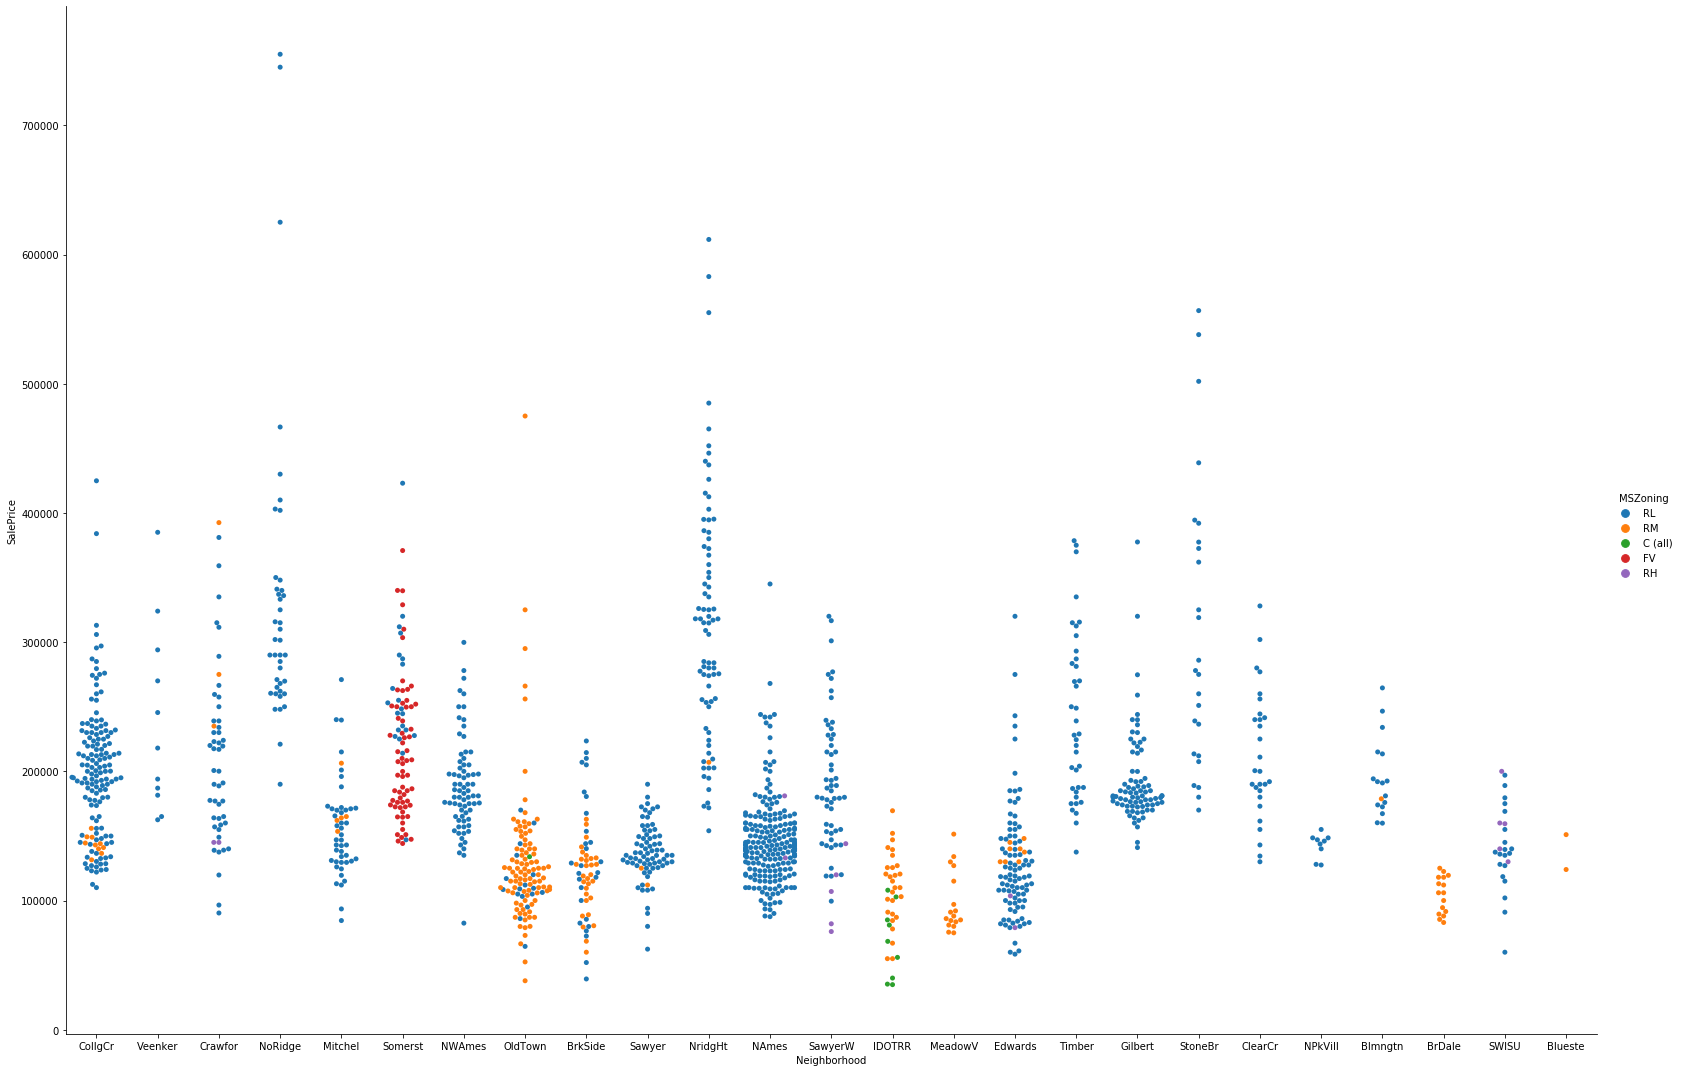

In [130]:
# TODO: code to generate Plot 5
df = pd.DataFrame({"Sale Price": train["SalePrice"], "Neighborhood": train["Neighborhood"]})
sb.factorplot(x="Neighborhood", y="SalePrice", hue="MSZoning", data=train, kind="swarm", size=15, aspect=1.5)

What interesting properties does Plot 5 reveal?

<p>
<ul>
    <li>RL: Residential Low Density</li>
    <li>RM: Residential Medium Density</li>
    <li>C(all): Commercial</li>
    <li>FV: Floating Village Residential</li>
    <li>RH: Residential High Density</li>
    </ul>
</p>
<p>This plot reveals Sale Prices by Neighborhood and color coded by the zone classification. Most of the neighborhood are residential low density (blue coloured). Old Town, Brookside, Iowa DOT and Rail Road, Meadow Village (orange coloured) are some of the residential medium density zones. NorthRidge, NorthRidge Heights and Stone Brook are some of the neighborhoods where some houses has prices greater that $\$500K$</p>

<p>
Most of the neighborhoods have similar type of zoning which means if a neighborhood is Residential Low Density houses then it hardly has any other type of zoing houses.
</p>

## Part 3 - Handcrafted Scoring Function

In [134]:
# TODO: code for scoring function
correlations = train.corr(method='pearson')
#Let us consider the following parameters to define the scoring function
cols = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]

data = train[cols]

#standardize the data
for column in data.columns:
    data[column] = (data[column] - data[column].mean()) / data[column].std()

#divide each value with the sum of all values in that column 
for column in correlations.columns.values:
    correlations[column] /= correlations[column].sum()

correlations["sum"] = correlations.sum(axis=1)
correlations["score"] = correlations["sum"] / correlations.shape[0]

score_col = correlations["score"]
#We multiply this score with each column value (the columns that we chose above) and add this column to the data frame
series = pd.Series(0, index=data.index, dtype='float64')
for column in data.columns:
    series = series + data[column] * score_col[column]
    
data["finalScore"] = series.astype('float64')
data = data.sort_values(by='finalScore')

What is the ten least desirable houses?

<p>The first column below is the id of the houses in the list of desirable houses.</p>

##### 10 Least Desirable Houses

<p>The first column showing the numbers in bold font is the row number of the training dataset which has the desirable house. </p>

In [135]:
data.head(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,finalScore
533,-3.687150,-0.836602,-1.688790,-2.410341,-2.143438,-2.248350,-1.025689,-2.779517,-2.364630,-2.212205,-0.795478
375,-3.687150,-1.631228,-1.688790,-0.853487,-0.668999,-1.163628,-2.840849,-1.549046,-2.364630,-2.212205,-0.691140
1100,-2.964082,-1.697446,-1.688790,-1.749305,-1.874417,-2.050436,-1.025689,-2.164281,-1.026506,-1.061623,-0.647819
916,-2.964082,-0.737274,-1.688790,-1.316213,-1.765774,-1.970509,-2.840849,-1.549046,-1.026506,-0.771639,-0.646212
636,-2.964082,-1.167696,-1.688790,-1.808570,-0.938019,-1.361542,-1.025689,-1.549046,-2.364630,-2.212205,-0.610379
1218,-1.517947,-0.803493,-1.688790,-2.410341,-1.269121,-1.148404,-1.025689,-2.164281,-2.364630,-2.212205,-0.600956
495,-1.517947,-1.697446,-1.688790,-0.769148,-1.144958,-1.513784,-1.025689,-1.549046,-2.364630,-2.212205,-0.565813
1337,-1.517947,-1.002149,-1.688790,-0.830693,-1.214800,-1.565165,-1.025689,-1.549046,-2.364630,-2.212205,-0.550624
649,-1.517947,-0.041976,-0.720051,-0.974297,-1.377764,-1.685056,-1.025689,-2.164281,-2.364630,-2.212205,-0.547221
976,-1.517947,-1.598118,-1.301294,-1.407390,-0.759534,-1.230234,-1.025689,-1.549046,-2.364630,-2.212205,-0.543854


What is the ten most desirable houses?

##### 10 Most Desirable Houses

In [13]:
data.tail(10)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,finalScore
1046,2.097391,1.116853,1.023678,2.130292,2.145369,2.573904,2.604629,2.757604,1.649742,1.136643,0.769707
769,1.374324,1.050634,0.878367,1.350726,1.364175,3.356046,2.604629,3.372840,1.649742,1.721289,0.785532
803,2.097391,1.216181,1.168989,1.542198,1.477991,2.486366,2.604629,3.372840,1.649742,2.558501,0.806699
798,2.097391,1.216181,1.168989,1.979850,2.078114,3.091526,2.604629,2.757604,1.649742,1.623068,0.813324
1169,2.820459,0.785759,0.539309,1.988967,1.728905,4.018297,2.604629,2.142369,1.649742,1.562265,0.815775
496,1.374324,0.686430,0.393998,4.883849,5.342573,3.258992,2.604629,2.142369,0.311618,0.341526,0.845227
691,2.820459,0.752649,0.490872,3.160597,3.314573,5.329478,2.604629,2.142369,1.649742,1.679194,0.979090
1182,2.820459,0.818868,0.539309,3.051184,3.229211,5.633962,2.604629,2.142369,1.649742,1.590328,0.990555
523,2.820459,1.183071,1.120552,4.742524,5.109767,6.014566,2.604629,2.757604,1.649742,1.922407,1.191837
1298,2.820459,1.216181,1.120552,11.517003,9.129553,7.852884,0.789470,3.372840,0.311618,4.420012,1.603595


##### Most Desirable House

In [14]:
train[cols].iloc[1298]

OverallQual       10
YearBuilt       2008
YearRemodAdd    2008
TotalBsmtSF     6110
1stFlrSF        4692
GrLivArea       5642
FullBath           2
TotRmsAbvGrd      12
GarageCars         2
GarageArea      1418
Name: 1298, dtype: int64

##### Least Desirable House

In [15]:
train[cols].iloc[533]

OverallQual        1
YearBuilt       1946
YearRemodAdd    1950
TotalBsmtSF        0
1stFlrSF         334
GrLivArea        334
FullBath           1
TotRmsAbvGrd       2
GarageCars         0
GarageArea         0
Name: 533, dtype: int64

Describe your scoring function and how well you think it worked.

<div>
<p>I selected the following columns as they have the most impact on the Sale Price of the houses.</p>
<ol>
    <li><b>OverallQual:</b> Rates the overall material and finish of the house</li>
    <li><b>YearBuilt:</b> Original construction date</li>
    <li><b>YearRemodAdd:</b> Remodel date (same as construction date if no remodeling or additions)</li>
    <li><b>TotalBsmtSF:</b> Total square feet of basement area</li>
    <li><b>1stFlrSF:</b> First Floor square feet</li>
    <li><b>GrLivArea:</b> Above grade (ground) living area square feet</li>
    <li><b>FullBath:</b> Full bathrooms above grade</li>
    <li><b>TotRmsAbvGrd:</b> Total rooms above grade (does not include bathrooms)</li>
    <li><b>GarageCars:</b> Size of garage in car capacity</li>
    <li><b>GarageArea:</b> Size of garage in square feet</li>
</ol>
    <p>Firstly, I standardized the data for these columns mentioned above. From the correlations matrix, I divided each correlation with the sum of correlations for that particular column, and then divided that each of this sum with the total number of parameters (which is the number of columns in the correlation matrix) to get a score. Once I got this score, I multiplied this score with the values of each column for the above mentioned selected columns and added a column named "finalScore" in the dataframe which gives the least and the most desirable houses.
    </p>
    <p>The Most Desirable House(MDH) came out to be the one with id=1298 and the Least Desirable House(LDH) had id=533. We can clearly see from the statistics of these two houses, that the MDH has Overall Quality of 10 as opposed to LDH which has 1. The MDH is newly built in 2008 whereas the LDH is built in the late 40s'. Also, the LDH does not have a basement and garage, and also the overall area of the house is quite less living area.
    </p>
    <p>I believe that the scoring worked pretty well as the Most Desirable House has all the good properties that someone would desire in his/her house, like a newly built infrastructure, large living area, basement, garage, etc.
    </p>
</div>

## Part 4 - Pairwise Distance Function

In [136]:
# TODO: code for distance function
from scipy.spatial.distance import pdist, squareform
#Let us consider the following columns for calculating the distance function
cols = ["OverallQual", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageCars", "GarageArea", "OpenPorchSF", "SalePrice"]
dist_train = train[cols]
dist_train.fillna(method='ffill', inplace=True)
distance_vector = pdist(dist_train, metric='euclidean')
distance_matrix = squareform(distance_vector)

In [137]:
#Finding the minimum value in the distance_matrix to find the houses which are closest to each other
min_x, min_y = 0, 1
for x in range(distance_matrix.shape[0]):
    for y in range(distance_matrix.shape[1]):
        if distance_matrix[x, y] < distance_matrix[min_x, min_y] and distance_matrix[x, y] != 0:
            min_x, min_y = x, y

<p><b>Two houses which are closest to each other</b></p>

In [138]:
print("Neighborhood: %s"%train.iloc[min_x]["Neighborhood"])
print(dist_train.iloc[min_x])
print("----------------------")
print("Neighborhood: %s"%train.iloc[min_y]["Neighborhood"])
print(dist_train.iloc[min_y])

Neighborhood: Edwards
OverallQual         6.0
YearBuilt        2004.0
MasVnrArea         50.0
BsmtFinSF1          0.0
TotalBsmtSF       970.0
1stFlrSF          970.0
GrLivArea        1709.0
FullBath            2.0
GarageCars          2.0
GarageArea        380.0
OpenPorchSF        40.0
SalePrice      130000.0
Name: 145, dtype: float64
----------------------
Neighborhood: Edwards
OverallQual         7.0
YearBuilt        2004.0
MasVnrArea         50.0
BsmtFinSF1          0.0
TotalBsmtSF       970.0
1stFlrSF          970.0
GrLivArea        1709.0
FullBath            2.0
GarageCars          2.0
GarageArea        380.0
OpenPorchSF        40.0
SalePrice      130000.0
Name: 193, dtype: float64


<p>These are the two different houses which are closest to each other as these two have the minimum distance in the distance matrix that we calculated above. Both the houses have alomst the same properties, the only difference that could be seen is a small difference in the Overall Quality of the house. This is an indication that the distance function is performing very well on the dataset.</p>
<p>Also when we look at the neighboorhood of the two houses, it is the same.</p>

<p><b>Let us now look at the two houses which are farthest from each other</b> i.e. the distance between the two is maximum in the distance matrix.</p>

In [139]:
#Finding the maximum value in the distance_matrix to find the houses which are farthest apart
max_x, max_y = 0, 1
for x in range(distance_matrix.shape[0]):
    for y in range(distance_matrix.shape[1]):
        if distance_matrix[x, y] > distance_matrix[max_x, max_y] and distance_matrix[x, y] != 0:
            max_x, max_y = x, y

In [140]:
print("Neighborhood: %s"%train.iloc[max_x]["Neighborhood"])
print(dist_train.iloc[max_x])
print("----------------------")
print("Neighborhood: %s"%train.iloc[max_y]["Neighborhood"])
print(dist_train.iloc[max_y])

Neighborhood: IDOTRR
OverallQual        4.0
YearBuilt       1920.0
MasVnrArea         0.0
BsmtFinSF1       495.0
TotalBsmtSF      720.0
1stFlrSF         720.0
GrLivArea        720.0
FullBath           1.0
GarageCars         0.0
GarageArea         0.0
OpenPorchSF      523.0
SalePrice      34900.0
Name: 495, dtype: float64
----------------------
Neighborhood: NoRidge
OverallQual        10.0
YearBuilt        1994.0
MasVnrArea       1170.0
BsmtFinSF1       1455.0
TotalBsmtSF      2444.0
1stFlrSF         2444.0
GrLivArea        4316.0
FullBath            3.0
GarageCars          3.0
GarageArea        832.0
OpenPorchSF        50.0
SalePrice      755000.0
Name: 691, dtype: float64


How well does the distance function work? When does it do well/badly?

<p>We can clearly see that the two houses that are apart have quite the different properties. For example, The house in IDOTRR (Iowa DOT and Rail Road) was built in 1920 whereas the one in NoRidge (Northridge) was built in 1994 and has an overall quality 10 which is way more higher than the house in IDOTRR. Also, we can clearly see the difference in the sale price which is quite understandable. First floor area of one house is more than thrice of the other and the basement area almost double. We can also see that there is no garage in the house built in 1920 whereas the garage in the house built in 1994 is quite big which has the capacity to occupy 3 cars.</p>

<p>Both are in different neighbourhood which confirms that they are distant from each other.<i> We can say that the distance funtion <b>(euclidean distance)</b> is performing really well on the selected properties of the house which were used as a measure for comparing the physical distances between the houses.</i></p>
<p>
    The following columns were used for the purpose of designing the distance matrix.
    <ol>        
        <li><b>OverallQual:</b> Rates the overall material and finish of the house</li>
        <li><b>YearBuilt:</b> Original Construction Date</li>
        <li><b>MasVnrArea:</b> Masonry veneer area in square feet</li>
        <li><b>BsmtFinSF1:</b> Type 1 finished square feet</li>
        <li><b>TotalBsmtSF:</b> Total square feet of basement area</li>
        <li><b>1stFlrSF:</b> First Floor square feet</li>
        <li><b>GrLivArea:</b> Above grade (ground) living area square feet</li>
        <li><b>FullBath:</b> Full bathrooms above grade</li>
        <li><b>GarageCars:</b> Size of garage in car capacity</li>
        <li><b>GarageArea:</b> Size of garage in square feet</li>
        <li><b>OpenPorchSF:</b> Open porch area in square feet</li>
        <li><b>SalePrice: Sale Price of the house</b></li>
    </ol>    
</p>

## Part 5 - Clustering

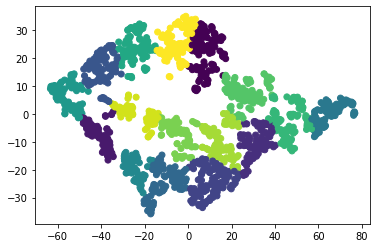

In [200]:
# TODO: code for clustering and visualization
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances as pdistance

#Applying TSNE to reduce the dimentions to plot in 2-Dimenstion
dat_TSNE = TSNE(n_components=2).fit_transform(pd.DataFrame(pdistance(dist_train, metric='correlation')))

#Applying K-Means clustring alogrithm
kmeans = KMeans(n_clusters=16, random_state=34)
dat_kmeans = kmeans.fit_predict(dat_TSNE)

df = pd.concat([pd.DataFrame(dat_TSNE), pd.DataFrame(dat_kmeans), pd.DataFrame(train_copy["SalePrice"])], axis = 1)
df.columns = ['x1', 'x2', 'cluster', 'price']

#Visualize scatter plot
plt.scatter(data=df, x='x1', y='x2', c=kmeans.labels_)
plt.show()

In [223]:
list = df[df["cluster"] == 5].index.values
train_copy.iloc[list]["Neighborhood"].value_counts().nlargest(4)

NAmes      38
Mitchel    13
NWAmes      9
CollgCr     7
Name: Neighborhood, dtype: int64

In [222]:
list = df[df["cluster"] == 8].index.values
train_copy.iloc[list]["Neighborhood"].value_counts().nlargest(4)

NridgHt    35
NoRidge    15
StoneBr     9
Timber      8
Name: Neighborhood, dtype: int64

In [221]:
list = df[df["cluster"] == 0].index.values
train_copy.iloc[list]["Neighborhood"].value_counts().nlargest(4)

Gilbert    31
OldTown    11
Somerst     9
NAmes       9
Name: Neighborhood, dtype: int64

In [220]:
list = df[df["cluster"] == 4].index.values
train_copy.iloc[list]["Neighborhood"].value_counts().nlargest(4)

NoRidge    21
NridgHt    14
Somerst    14
CollgCr    11
Name: Neighborhood, dtype: int64

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

<p>I have distributed the whole dataset in 16 clusters, and checked the neighborhood of the some of the clusters. As I can see from the above results, cluster 5 belongs to the NAmes (North Ames) neighborhood, cluster 8 belongs to NridgHt (Northridge Heights), cluster 0 belongs to Gilbert and cluster 4 belongs to NoRidge (Northridge). I can say this because most number of houses in that cluster belongs to these neighborhood.</p>

 <p>Since the number of neighborhoods in total in the dataset is 25 and I am clustering the data into only 16 clusters (0 to 15), the neighborhood which are close to some other neighborhood are included in their cluster. For example, for cluster 8, NridgHt is seen in most seen neighborhood in the cluster and the second most seen neighborhood in that cluster is NoRidge. Now, when I checked the cluster containing most houses from NoRidge (cluster 4), I saw that the second most occured neighborhood in cluster 4 is NridgHt. Thus, I can say that the NorthRidge (NoRidge) and Northridge Heights (NridgHt) are close neighborhoods.</p>
 
 <p>The clusters are reflecting the neighborhood boundaries fairly well. Although, we cannot concretly say that this euclidean distance function applied on the chosen columns is giving highly accurate results, but we can say that the results are fairly well as we are able to analyze from the output which neighborhood are closer to each other.</p>

## Part 6 - Linear Regression

In [30]:
#importing necessary modules
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [278]:
# TODO: code for linear regression
# Checking which all columns has the most impact on the Sale Price of the houses
encoded_train = train.copy()
encoded_train.drop(["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond"], axis=1, inplace=True)
series = encoded_train.applymap(np.isreal).iloc[0].items()
for index,item in series:    
    if item == False:
        try:
            encodeData(encoded_train, index)
        except:
            print(index)
correl_data = encoded_train.corr(method='pearson')
correl_data[correl_data["SalePrice"]>0.4]["SalePrice"]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [279]:
y_train = encoded_train.pop("SalePrice")
cols = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea"]
x_train = encoded_train[cols]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

#Training
reg = LinearRegression().fit(x_train, y_train)

#Prediction
y_pred_val = reg.predict(x_val)
y_pred_val = y_pred_val.astype(int)


def mean_absolute_error_percentage(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Accuracy
error_percent = mean_absolute_error_percentage(y_val, y_pred_val)
print("Percentage error of linear regression classifier: %f percent!"% error_percent)


encoded_test = test.copy()
encoded_test.drop(["Functional", "KitchenQual", "MSZoning", "MasVnrType","Fence", "SaleType", "Utilities", "Exterior1st", "Exterior2nd", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType", "GarageFinish", "GarageQual", "GarageCond"], axis=1, inplace=True)
series = encoded_test.applymap(np.isreal).iloc[0].items()
for index,item in series:    
    if item == False:
        try:
            encodeData(encoded_test, index)
        except:
            print(index)


x_test = encoded_test[cols]
x_test["TotalBsmtSF"].fillna(x_test["TotalBsmtSF"].mode()[0], inplace=True)
x_test["GarageCars"].fillna(x_test["GarageCars"].mode()[0], inplace=True)
x_test["GarageArea"].fillna(x_test["GarageArea"].mode()[0], inplace=True)

x_test = sc.fit_transform(x_test)
y_pred_test = reg.predict(x_test)
y_pred_test = y_pred_test.astype(int)

submission = pd.DataFrame()
submission['Id'] = test["Id"]
submission['SalePrice'] = y_pred_test

submission.to_csv('submission.csv', index=False)

Percentage error of linear regression classifier: 14.974584 percent!


In [280]:
#clearing memory
del x_train, y_train, x_val, y_val, y_pred_val

How well/badly does it work? Which are the most important variables?

<p>The error percentage of the linear regression classifier came out to be approximately 14% which is not that bad. This model gives us resonable predictions.</p>
<p>The most important variables that contribute more on the sale price are:
    <ol>
        <li>OverallQual</li>
        <li>TotalBsmtSF</li>
        <li>1stFlrSF</li>
        <li>GrLivArea</li>
        <li>GarageCars</li>
        <li>GarageArea</li>
    </ol>
</p>

##### Training a Ridge regression model

In [281]:
#Load Data
train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [282]:
#Preprocessing the data for Ridge Regression
X_train = train.copy()
X_train_Id = X_train.pop("Id")
Y_train = X_train.pop("SalePrice")
X_train.dropna(thresh = X_train.shape[0]*0.7, how='all', axis=1, inplace=True)

cols = X_train.columns

#Preprocess train data
X_train.fillna(method='ffill', inplace=True)

series = X_train.applymap(np.isreal).iloc[0].items()
for index,item in series:    
    if item == False:        
        encodeData(X_train, index)
        
#Training
clf = Ridge(alpha=4, normalize=True)
clf.fit(X_train, Y_train)

#Preprocess test data
X_test = test.copy()
X_test_Id = X_test.pop("Id")

X_test = X_test[cols]
# X_test = pd.DataFrame(imp_mode.fit_transform(X_test))
X_test.fillna(method='ffill', inplace=True)
series = X_test.applymap(np.isreal).iloc[0].items()
for index,item in series:
    if item == False:
        encodeData(X_test, index)

#Prediction
Y_pred_test = clf.predict(X_test)

#Creating submission file
submission = pd.DataFrame()
submission['Id'] = X_test_Id
submission['SalePrice'] = Y_pred_test

submission.to_csv('submission_ridge.csv', index=False)

##### Training a XG Boost Classifier

In [226]:
from xgboost import XGBClassifier

In [283]:
#Load Data
train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [284]:
#Preprocessing the data for Ridge Regression
X_train = train.copy()
X_train_Id = X_train.pop("Id")
Y_train = X_train.pop("SalePrice")
X_train.dropna(thresh = X_train.shape[0]*0.7, how='all', axis=1, inplace=True)

cols = X_train.columns

#Preprocess train data
X_train.fillna(method='ffill', inplace=True)


series = X_train.applymap(np.isreal).iloc[0].items()
for index,item in series:    
    if item == False:        
        encodeData(X_train, index)
        
#Training
clf = XGBClassifier(alpha=4, normalize=True)
clf.fit(X_train, Y_train)

#Preprocess test data
X_test = test.copy()
X_test_Id = X_test.pop("Id")

X_test = X_test[cols]
# X_test = pd.DataFrame(imp_mode.fit_transform(X_test))
X_test.fillna(method='ffill', inplace=True)
series = X_test.applymap(np.isreal).iloc[0].items()
for index,item in series:
    if item == False:
        encodeData(X_test, index)

#Prediction
Y_pred_test = clf.predict(X_test)

#Creating submission file
submission = pd.DataFrame()
submission['Id'] = X_test_Id
submission['SalePrice'] = Y_pred_test

submission.to_csv('submission_xgboost.csv', index=False)

In [285]:
#Clearing memory
del X_train, X_test

## Part 7 - External Dataset

In [227]:
#Load train and test data
train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")
weather_data = pd.read_csv("data\\ames_weather.csv")

In [245]:
#Merge the train and new data
year_data = pd.to_datetime(weather_data["valid"]).dt.year
weather_data.drop(columns = ["valid"], inplace=True)
weather_data["YrSold"] = year_data
X_train = pd.merge(X_train,weather_data, on="YrSold")

In [252]:
#Merge the test and new data
test = pd.merge(X_test,weather_data, on="YrSold")

In [286]:
#Preprocessing the data for Ridge Regression on merged data
X_train = train.copy()
X_train_Id = X_train.pop("Id")
Y_train = X_train.pop("SalePrice")
X_train.dropna(thresh = X_train.shape[0]*0.7, how='all', axis=1, inplace=True)

cols = X_train.columns

#Preprocess train data
X_train.fillna(method='ffill', inplace=True)

series = X_train.applymap(np.isreal).iloc[0].items()
for index,item in series:    
    if item == False:        
        encodeData(X_train, index)
        
#Training
clf = Ridge(alpha=4, normalize=True)
clf.fit(X_train, Y_train)

#Preprocess test data
X_test = test.copy()
X_test_Id = X_test.pop("Id")

X_test = X_test[cols]
X_test.fillna(method='ffill', inplace=True)
series = X_test.applymap(np.isreal).iloc[0].items()
for index,item in series:
    if item == False:
        encodeData(X_test, index)

#Prediction
Y_pred_test = clf.predict(X_test)

#Creating submission file
submission = pd.DataFrame()
submission['Id'] = X_test_Id
submission['SalePrice'] = Y_pred_test

submission.to_csv('submission_ridge_merged_data.csv', index=False)
print(submission.shape)

(1459, 2)


In [271]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3)

#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)

#Training
reg = Ridge(alpha=4, normalize=True).fit(x_train, y_train)

#Prediction
y_pred_val = reg.predict(x_val)
y_pred_val = y_pred_val.astype(int)


def mean_absolute_error_percentage(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Accuracy
error_percent = mean_absolute_error_percentage(y_val, y_pred_val)
print("Percentage error of ridge regression classifier: %f percent!"% error_percent)


Percentage error of ridge regression classifier: 14.621372 percent!


Describe the dataset and whether this data helps with prediction.

<p>The dataset is Ames weather data which has the following columns:</p>
<ol>
    <li>tmpf: Air Temperature in Fahrenheit</li>
    <li>dwpf: Dew Point Temperature in Fahrenheit</li>
    <li>relh: Relative Humidity in %</li>
    <li>feel: Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit</li>
    <li>sped: Wind Speed in mph</li>
    <li>vsby: Visibility in miles</li>
    <li>valid: Date and Time</li>
</ol>

<p>
There are approximately 45 thousand rows in the dataset. To merge the datasets, I first converted the date in proper format and then extracted the year from it. Then, I merged the two dataset on the YearSold column of houses and year column of the weather data.
</p>

<p>
The idea behind choosing this dataset was to see if the atmospheric conditions of the areas affect the sale price of the houses or not. Apparently, the addition of this new data did not make much impact on the sale price predictions. The RMSE came out to be approximately same as that of the first linear regression model tested which is around 14%. So, I concluded that this data is not much of help when it comes to predicting the sale price of the houses.
</p>

## Part 8 - Permutation Test

In [98]:
# TODO: code for all permutation tests
from sklearn.model_selection import permutation_test_score
cols = ["OverallCond", "Utilities", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "PoolArea", "ExterCond", "GarageYrBlt", "Fireplaces", "Street", "LandContour", "LowQualFinSF", "GarageArea"]
ridge = Ridge(alpha=4, normalize=True)
p_value_list = []
for col in cols:
    score, permutation_scores, p_value =  permutation_test_score(ridge, np.array(X_train[col]).reshape(-1,1), Y_train, scoring="neg_mean_squared_log_error", n_permutations=110, n_jobs=-1)
    p_value_list.append({"column": col,"p_value":p_value})

In [99]:
for i in range(len(p_value_list)):
    print(p_value_list[i]['column'], np.around(p_value_list[i]['p_value'], decimals=5))

OverallCond 0.06306
Utilities 0.3964
YearRemodAdd 0.00901
TotalBsmtSF 0.00901
1stFlrSF 0.00901
PoolArea 0.05405
ExterCond 0.00901
GarageYrBlt 0.00901
Fireplaces 0.00901
Street 0.0991
LandContour 0.33333
LowQualFinSF 0.16216
GarageArea 0.00901


Describe the results.

<p>I used the columns which are listed above. The columns with lower p-value are the ones which are most effective in the prediction of sale price. There are some columns like LandContour, Utilities and LowQualFinSF which does not have much effect on the sale price of the houses. These columns have high p-value.</p>

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: <a href="https://www.kaggle.com/pulkitd">Kaggle Profile</a>

Highest Rank: 1360

Score: 0.12415

Number of entries: 8

In [289]:
# INCLUDE IMAGE OF YOUR KAGGLE RANKING
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://docs.google.com/uc?export=download&id=1o9E3KmPNHS-2D8T3rttwkPh-cpGyMd1u")